# Exercise: NEISS, Question Set C

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Reading tab-separated files
- Ignoring bad lines
- Replacing values
- Using numpy/`np.nan`
- String search using regular expressions
- Averages practice
- Converting `.value_counts()` and similar results into DataFrames

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [26]:
import pandas as pd
import numpy as np
import re
import statistics
%matplotlib inline
df = pd.read_csv('nss15.tsv', sep="\t", error_bad_lines=False)
df

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,2,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,1,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,1,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,1,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,2,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


### Check that your dataframe has 357727 rows and 19 columns.

In [27]:
df.shape

(357727, 19)

### List the columns and their data types

In [28]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [29]:
# CPSC Case        case number
# trmt_date        date of treatment
# psu            int64
# weight         float64
# stratum       object
# age              age of patient; For children under two years old, record the age in months. To show that the age is in months instead of years, put a "2" in the first space of the age code.
# sex              sex of patient
# race             race of patient
# race_other       if race is not listed
# diag             Diagnosis
# diag_other       If none of the listed diagnoses in Appendix B is appropriate, use code 71, Other/Not Stated. Whenever you use diagnosis code 71, please record the actual diagnosis in the DIAGNOSIS OTHER text field.
# body_part       body part affected
# disposition     Disposition of Case
# location        Incident Locale
# fmv           int64
# prod1         Products Involved
# prod2         float64
# narr1         Comments/Narrative
# narr2         object

# Cleaning up a column

Take a look at the **sex** column. How many rows of each sex are there?

In [30]:
df.sex.value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to page 7 of the column definitions file.

In [31]:
#df.sex.rename({'1': 'Male', '2': 'Female', '0': 'Not recorded'}, inplace=True)
df['sex'].replace([1, 2, 0], ['Male', 'Female', 'Not recorded'], inplace=True)
df

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY
5,150721815,07/02/2015,32,5.6748,C,216,Female,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE..."
6,150713483,06/08/2015,93,15.7762,V,25,Male,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...
7,150704114,06/14/2015,56,83.2157,S,53,Male,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN
8,150736558,07/16/2015,70,83.2157,S,98,Male,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN
9,150734928,07/13/2015,51,74.8813,L,48,Female,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...


## Confirm you have 195071 male, 162654 female, and 2 "Not Recorded."

In [32]:
df.sex.value_counts()

Male            195071
Female          162654
Not recorded         2
Name: sex, dtype: int64

## Graph the number of men and women, but don’t included the “Not Recorded” records

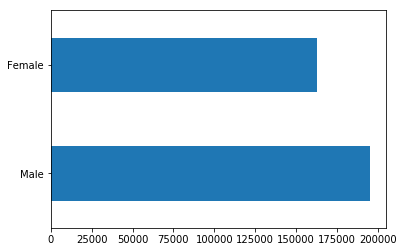

In [33]:
df[df.sex != 'Not recorded']['sex'].value_counts().plot(kind='barh')

## "Not recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [34]:
df['sex'].replace('Not recorded', np.nan, inplace=True)

In [35]:
df['sex'].value_counts()

Male      195071
Female    162654
Name: sex, dtype: int64

## Graph the count of men and women, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

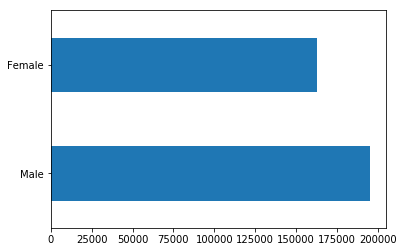

In [36]:
df.sex.value_counts().plot(kind='barh')

# Wall punching

## Find every instance where the narrative includes punching a wall

Include phrases like "punched a wall" or "punch wall" or "punched ten thousand walls." Do not type them each individually. How do you do that?????

In [37]:
df_punch = df[df['narr1'].str.contains("PUNCH.*WALL", re.IGNORECASE, na=False)]

## Graph the gender distribution of wall-punching.

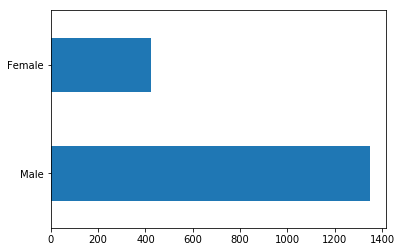

In [38]:
df_punch['sex'].value_counts().plot(kind="barh")

## Find the average age of a wall-puncher.

Graph the distribution of the ages, too.

In [39]:
print("The average age of a wall-puncher is", df_punch['age'].mean())

The average age of a wall-puncher is 24.3036117381


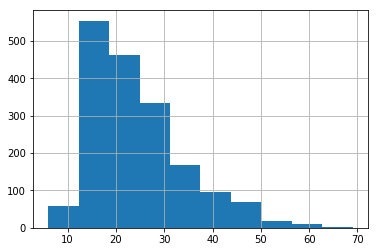

In [40]:
df_punch['age'].hist()

# Which months are the most popular for wall punching?

The month is hidden inside of the `trmt_date` column - you'll need to extract it. To check, January should have 27109 cases.

In [41]:
df_punch['month'] = df_punch['trmt_date'].str.extract("(\d\d)")
df_punch

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,month
246,150532226,05/07/2015,63,97.9239,M,38,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,38YOM PUNCHED A WALL FRACTURED HAND,NaN,05
582,150954076,09/16/2015,22,15.7762,V,13,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,"PT PUNCHED A WALL. FRACTURE METACARPAL, RIGHT,...",NaN,09
604,150541260,04/09/2015,53,15.0591,V,22,Male,1,NaN,71,HAND INJURY,82,1,1,0,1884,NaN,22YOM-HAND INJURY-PUNCHED A CEMENT WALL IN ANG...,NaN,04
704,151017458,10/05/2015,61,16.5650,V,15,Female,1,NaN,53,NaN,82,1,1,0,1884,NaN,15 YOF C/O RIGHT HAND PAIN SINCE PUNCHING A WA...,DX: CONTUSION OF HAND,10
741,150433154,04/02/2015,91,15.0591,V,33,Male,1,NaN,57,NaN,82,1,0,0,1884,NaN,33YOM PUNCHED A WALL X1 WEEK AGO W/ SHARP PAIN...,"DX: ACUTE CLOSED FX OF FIFTH METACARPAL, BOXER...",04
782,150805902,07/22/2015,3,74.8813,L,28,Male,0,NaN,71,HAND INJ,82,1,0,0,1884,NaN,28YOM PUNCHED A WALL AND INJ RT HAND,NaN,07
1098,150455805,03/27/2015,93,15.0591,V,25,Female,1,NaN,53,NaN,82,1,0,0,1884,NaN,25 YOF PUNCHED A WALL.,DX: R HAND CONT.,03
1571,150519707,04/21/2015,77,15.0591,V,14,Male,0,NaN,57,NaN,82,1,0,0,1884,NaN,14YOM SUST FX TO HAND WHEN HE PUNCHED A WALL*,NaN,04
1616,151112964,09/21/2015,26,15.7762,V,16,Male,2,NaN,53,NaN,82,1,5,0,1884,NaN,16 YOM CONTUSION TO HAND AFTER PUNCHING A WALL,NaN,09
1660,150446653,04/14/2015,33,15.0591,V,52,Male,1,NaN,57,NaN,82,1,1,0,1884,NaN,52 YOM PUNCHED WALL L HAND DX: FX 5TH MC,NaN,04


## Graph the amount of wall punching in each month

Having numbers on the x axis (1-12) is fine.

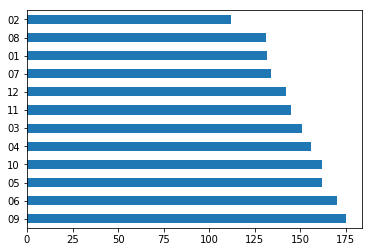

In [42]:
df_punch['month'].value_counts().plot(kind='barh')

## Sort the graph so that the months are in order from Jan-Dec (or 01-12)

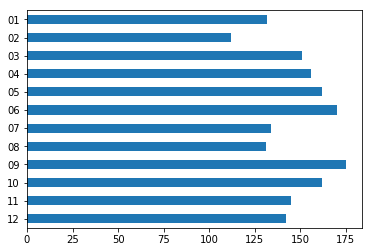

In [43]:
df_punch['month'].value_counts().sort_index(ascending=False).plot(kind='barh')

## What month is most common for air conditioner-related injuries?

Use the product code, which you can find in `2017ComparabilityTable.pdf` or `categories-cleaned.txt`.

In [44]:
df['month'] = df['trmt_date'].str.extract("(\d\d)")
df

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """Entry point for launching an IPython kernel.


,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,month
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,07
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...,07
2,150817487,08/02/2015,51,74.8813,L,20,Female,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...,08
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN,06
4,150721694,07/04/2015,42,74.8813,L,88,Female,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY,07
5,150721815,07/02/2015,32,5.6748,C,216,Female,1,NaN,71,DOG SCRATCH/BITE,76,1,1,0,1715,NaN,16 MOF AT HOME PULLED FAMILY DOG-HUSKIES COLLA...,"ND SCRAPING TEETH ON PTS FACE, NOT A TRUE BITE...",07
6,150713483,06/08/2015,93,15.7762,V,25,Male,2,NaN,51,NaN,33,4,9,3,1138,NaN,25 YOM WAS CAMPING WHEN FRIEND THREW A PRESSUR...,WHICH FLASHED. FD NS. DX: BURNS L UPPER & LOW...,06
7,150704114,06/14/2015,56,83.2157,S,53,Male,1,NaN,57,NaN,30,1,0,0,5040,NaN,53 YOM BIKE WRECK SUNDAY PAIN CHEST SHOULDER &...,NaN,06
8,150736558,07/16/2015,70,83.2157,S,98,Male,2,NaN,59,NaN,76,1,1,0,1807,NaN,98 Y/O M FELL IN FLOOR AND LACERATED FACE,NaN,07
9,150734928,07/13/2015,51,74.8813,L,48,Female,2,NaN,53,NaN,79,1,5,0,4057,1807.0,"48 YO F, C/O RT FLANK PAIN 6 DAYS S/P FALL WAS...",ABLE WHICH HIT THE FLOOR STRIKING RT FLANK DX ...,07


In [46]:
ac_related = ['0301', '0302', '0321', '0357', '0358', '0381']
df_ac = df[df.prod1.isin(ac_related)]
df_ac

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,month
1917,150902259,08/30/2015,58,15.7762,V,9,Male,0,NaN,59,NaN,35,1,1,0,381,NaN,9 YOM HIT KNEE ON AIR CONDITIONER,DX LACERATION,08
1940,150446654,04/22/2015,33,15.0591,V,41,Male,1,NaN,54,NaN,83,1,1,0,381,NaN,41 YOM DROPPED AIR CONDITIONER ON L FOOT AT HO...,NaN,04
3338,150759303,07/10/2015,21,15.7762,V,42,Female,0,NaN,64,NaN,79,1,1,0,381,NaN,42YF C/OLT SIDED FLANK PAIN THAT BEGAN WHILE R...,HE AIR-CONDITIONER>>MS,07
3464,150451830,04/19/2015,53,15.0591,V,33,Female,1,NaN,71,SHOULDER PAIN,30,1,1,0,381,NaN,33YOF-SHOULDER & ANKLE PAIN-FELL WHILE CARRYIN...,ME,04
3795,150717896,07/05/2015,7,83.2157,S,49,Female,0,NaN,59,NaN,88,1,1,0,381,NaN,49 Y O F LIP LACERATION SHE TRIPPED AND STRUCK...,PLAYING WITH HER DOG,07
6588,150809366,08/01/2015,61,15.7762,V,4,Male,1,NaN,62,NaN,75,1,1,0,381,NaN,4 YOM FELL WHILE PLAYING AT HOME AND HIT BACK ...,DX: CLOSED HEAD INJURY,08
6714,151014802,08/26/2015,14,49.2646,M,53,Female,0,NaN,59,NaN,34,1,1,0,381,NaN,53YOF LAC WRIST - INSTALLING A/C UNIT,NaN,08
6958,151143964,11/13/2015,51,74.8813,L,18,Female,2,NaN,71,HEADACHE,75,1,0,0,381,NaN,18 YO F C/O FRONTAL HEADACHE S/P HITTING HEAD ...,DAY DX HEADACHE,11
8569,151059865,10/21/2015,95,16.5650,V,53,Male,1,NaN,64,NaN,79,1,0,0,381,NaN,LUMBAR STR. 53YOM STRAINED LOWER BACK MOVING ...,NaN,10
8970,150636079,06/08/2015,79,83.2157,S,85,Male,1,NaN,59,NaN,33,1,1,0,381,1870.0,85YOM WAS PUTTING IN WINDOW AIRCONDIONER AND I...,OWER ARM INJURED ARM ON WINDOW FRAME,06


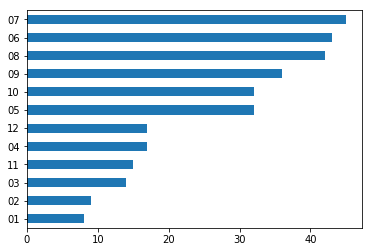

In [47]:
df_ac['month'].value_counts().sort_values(ascending=True).plot(kind='barh')

## Find what else people punched using the prod1 and prod2 columns.

Look at the top 10 for each separately.

In [48]:
df_punch = df[df['narr1'].str.contains('PUNCH')]
df_punch['prod1'].value_counts().head(10)

1884    1796
1894     566
1893     244
1207     159
4004     122
276       74
4057      53
1892      48
1726      42
1807      41
Name: prod1, dtype: int64

In [49]:
df_punch['prod2'].value_counts().head(10)

1884.0    31
1893.0    13
1207.0     7
1807.0     7
1892.0     6
4056.0     6
604.0      4
1865.0     4
1819.0     3
676.0      3
Name: prod2, dtype: int64

## Uh, they're the same!

The order of `prod1` and `prod2` don't actually matter!

> When only one product is associated with an injury, place the product code for that product in the space allocated for "First Product Code" and fill in the "Second Product Code" spaces with 4 zeros (0000).
When two products are associated with an injury, either product may be coded as the first product and the other as the second product.
>
> Example: An 11-year old boy riding a bicycle ran into a swing. Code: Product 1 = 5040 (bicycle) and Product 2 = 3246 (swings) or
>
> Code: Product 1 = 3246 (swings) and Product 2 = 5040 (bicycle)

## Okay, okay, there’s no difference between prod1 and prod2, so you should add their frequencies together for an overall count!

It's *almost* as easy as adding together the `value_counts()`.

Take a look at the air conditioner question and the `.value_counts()` you just did, though, to see why combining them might not be that simple. **What is different about `prod1` and `prod2`?** You probably have to go all the way back up to where you read the file in to make them match.

In [72]:
df['prod1'].value_counts() + (df['prod2'].value_counts())

102.0         NaN
106.0        26.0
107.0         NaN
110.0         NaN
112.0        62.0
113.0        14.0
114.0        19.0
115.0       436.0
116.0         2.0
118.0         NaN
119.0         3.0
125.0         NaN
127.0       197.0
131.0        61.0
132.0        12.0
133.0         NaN
134.0        60.0
136.0        51.0
137.0        45.0
138.0        40.0
139.0         NaN
140.0       341.0
212.0         NaN
213.0         NaN
214.0       211.0
215.0       246.0
216.0         NaN
217.0        14.0
218.0         NaN
219.0        20.0
           ...   
4083.0        6.0
4084.0        5.0
4802.0       34.0
5001.0        9.0
5005.0      152.0
5006.0       33.0
5010.0      158.0
5011.0      318.0
5013.0        NaN
5016.0      576.0
5017.0      356.0
5018.0       39.0
5019.0      128.0
5020.0      112.0
5021.0      360.0
5029.0      137.0
5030.0      894.0
5031.0      587.0
5032.0        NaN
5033.0      207.0
5034.0     2080.0
5035.0        NaN
5036.0     1126.0
5037.0       88.0
5040.0    

In [74]:
result = ((df['prod1'].value_counts()) + (df['prod2'].value_counts())).sort_values(ascending=False)
result.index = result.index.astype('int')
result

1807    41907.0
1842    30247.0
4076    18088.0
1205    14293.0
5040    12898.0
1211    11755.0
1884     9665.0
4057     9441.0
4074     9041.0
1893     8263.0
611      7817.0
464      7607.0
3299     7325.0
1267     7212.0
679      5561.0
1615     4943.0
4056     3975.0
676      3920.0
4078     3855.0
1817     3413.0
604      3401.0
1141     3386.0
1233     3269.0
5041     3118.0
1871     3008.0
1616     3007.0
649      2906.0
1333     2895.0
1819     2865.0
1894     2716.0
         ...   
1654        NaN
1664        NaN
1690        NaN
1728        NaN
1730        NaN
1739        NaN
1826        NaN
1854        NaN
1866        NaN
1888        NaN
1891        NaN
1903        NaN
1914        NaN
1929        NaN
3202        NaN
3203        NaN
3229        NaN
3230        NaN
3260        NaN
3261        NaN
3276        NaN
3282        NaN
3285        NaN
3291        NaN
3296        NaN
4070        NaN
5013        NaN
5032        NaN
5035        NaN
5044        NaN
Length: 763, dtype: floa

## Turn that into a dataframe

Use `.reset_index()` on the result to turn it into a dataframe. Rename your columns to be `product_code` and `injury_count`.

In [81]:
df_total = (result).reset_index().rename(columns={'index': 'product_code', 0: 'injury_count'})
df_total.head(10)

,product_code,injury_count
0,1807,41907.0
1,1842,30247.0
2,4076,18088.0
3,1205,14293.0
4,5040,12898.0
5,1211,11755.0
6,1884,9665.0
7,4057,9441.0
8,4074,9041.0
9,1893,8263.0


## Fix the product codes

Uh, wait, look at those product codes. "102" shouldn't be possible, it should be `0102` - this actually doesn't have to do with coding, it has to do with *the data doesn't match the codebook*.

### Add zeroes to the left of the product code until it is 4 characters long

In [83]:
df_total['product_code'] = df_total['product_code'].astype(str).str.pad(4, fillchar='0')
df_total.head(11)

,product_code,injury_count
0,1807,41907.0
1,1842,30247.0
2,4076,18088.0
3,1205,14293.0
4,5040,12898.0
5,1211,11755.0
6,1884,9665.0
7,4057,9441.0
8,4074,9041.0
9,1893,8263.0


## Get meaningful names for "product code"

Join with `categories-cleaned.txt` to turn the codes into actual words. **When you read in `categories-cleaned.txt`, make sure it has 803 rows and 2 columns.**

In [84]:
df_categories = pd.read_csv('categories-cleaned.txt', names = ['product_code', 'meaning'])
df_categories['product_code'] = df_categories['product_code'].astype('str').str.pad(4, fillchar='0')
df_categories

,product_code,meaning
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories
5,0113,Floor buffers or waxers
6,0114,Rug shampooers
7,0115,Vacuum cleaners
8,0116,Electric brooms
9,0118,Gas water heaters


In [85]:
df_merged = df_total.merge(df_categories, on='product_code')
df_merged.sort_values(by='injury_count', ascending=False)

,product_code,injury_count,meaning
0,1807,41907.0,Floors or flooring materials
1,1842,30247.0,Stairs or steps (excluding pull-down and foldi...
2,4076,18088.0,"Beds or bedframes, other or not specified"
3,1205,14293.0,"Basketball (activity, apparel or equipment)"
4,5040,12898.0,Bicycles or accessories (excluding mountain or...
5,1211,11755.0,"Football (activity, apparel or equipment)"
6,1884,9665.0,Ceilings and walls (interior part of completed...
7,4057,9441.0,"Tables, not elsewhere classified (excl. baby c..."
8,4074,9041.0,"Chairs, other or not specified"
9,1893,8263.0,"Doors, other or not specified"


### Confirm that it worked by seeing if product code '0102' gives you 'Wringer washing machines"

In [86]:
df_merged[df_merged['product_code'] == '0102']

,product_code,injury_count,meaning
640,0102,NaN,Wringer washing machines


## Graph the top 10 most popular products for injuries 

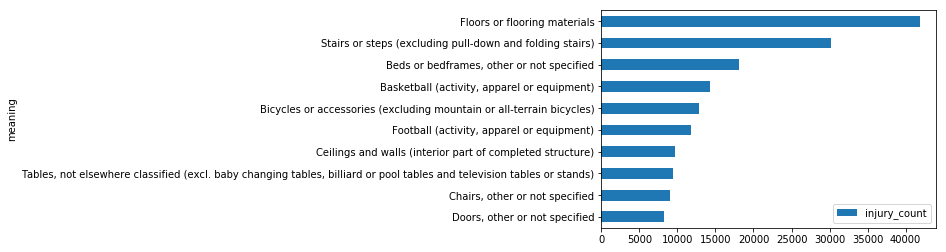

In [105]:
df_merged.sort_values(by='injury_count', ascending=False).head(10).sort_values(by='injury_count').plot(kind='barh', x='meaning')